In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os


import pandas as pd
import seaborn
import math
import sklearn
import datetime
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import itertools
from sklearn import tree
import numpy as np

In [3]:
orig=pd.read_csv("data.csv")
orig.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
orig2=orig[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]



In [5]:
X = orig2.drop("diagnosis", axis=1)
y = orig2["diagnosis"]
print(X.shape, y.shape)

(569, 31) (569,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

k: 1, Train/Test Score: 1.000/0.839
k: 3, Train/Test Score: 0.885/0.762
k: 5, Train/Test Score: 0.824/0.734
k: 7, Train/Test Score: 0.793/0.706
k: 9, Train/Test Score: 0.751/0.678
k: 11, Train/Test Score: 0.742/0.685
k: 13, Train/Test Score: 0.737/0.699
k: 15, Train/Test Score: 0.725/0.692
k: 17, Train/Test Score: 0.702/0.685
k: 19, Train/Test Score: 0.697/0.685
k: 21, Train/Test Score: 0.702/0.685
k: 23, Train/Test Score: 0.692/0.713
k: 25, Train/Test Score: 0.685/0.699
k: 27, Train/Test Score: 0.683/0.699
k: 29, Train/Test Score: 0.690/0.692
k: 31, Train/Test Score: 0.692/0.692
k: 33, Train/Test Score: 0.695/0.692
k: 35, Train/Test Score: 0.700/0.692
k: 37, Train/Test Score: 0.692/0.692
k: 39, Train/Test Score: 0.695/0.692
k: 41, Train/Test Score: 0.695/0.692
k: 43, Train/Test Score: 0.697/0.699
k: 45, Train/Test Score: 0.669/0.685
k: 47, Train/Test Score: 0.674/0.692
k: 49, Train/Test Score: 0.646/0.671


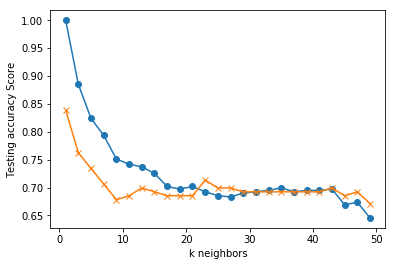

<Figure size 432x288 with 0 Axes>

In [12]:
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()
plt.savefig('knn1.jpg')

In [14]:
plt.savefig('kneigh.jpg')

<Figure size 432x288 with 0 Axes>

In [8]:
def classify(model,X_test,X_train,y_train):
    """predicts y first, classify, """
    y_pred = model.predict(X_test)
    print(metrics.classification_report(y_test,y_pred))
#     print(model.score(*Xy_test))
    print(metrics.confusion_matrix(y_test, y_pred))
    return metrics.confusion_matrix(y_test, y_pred)

In [9]:
confusion_matrix=classify(knn,X_test,X_train,y_train)

              precision    recall  f1-score   support

           B       0.67      0.93      0.78        90
           M       0.67      0.23      0.34        53

   micro avg       0.67      0.67      0.67       143
   macro avg       0.67      0.58      0.56       143
weighted avg       0.67      0.67      0.62       143

[[84  6]
 [41 12]]


In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Biostats',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Test')
    plt.xlabel('Disease')

Confusion matrix, without normalization
[[84  6]
 [41 12]]


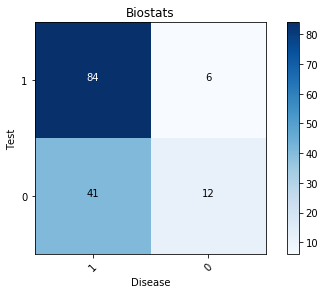

In [11]:
plot_confusion_matrix(confusion_matrix,[1,0])
plt.savefig('cm2.png')

In [17]:
knn.score(X_test, y_test)

0.6713286713286714

In [18]:
sensitivity=84/125; specificity=12/18; PPV=84/90
sensitivity,specificity,PPV

(0.672, 0.6666666666666666, 0.9333333333333333)